<a href="https://colab.research.google.com/github/DaVieci/real-estate-price-prediction/blob/main/Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real Estate Price Prediction with ML

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
sns.set(rc={"figure.figsize":(15, 5)})

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## Read the Data

In [ ]:
path = "./Real_Estate_Prices.csv"

In [ ]:
df = pd.read_csv(path)

## Optional: Explore the Data

In [ ]:
df

,AnzahlZimmer,Ausbaustufe,Baeder,BaederUG,Baujahr,Bebauungsdichte,Dachtyp,EG_qm,Fassadenqual,Fassadenzustand,...,Neuverkauf,Seelage,ToilettenEG,ToilettenUG,Typ,Umgebaut,Verkaufsjahr,Verkaufsmonat,Wohnflaeche_qm,Z_Verkaufspreis
0,3,NaN,1,1,1989,Niedrig,Satteldach,95,Durchschnitt,Durchschnitt,...,nein,nein,0,0,Freistehend,1989,2017,10,95,154772
1,3,1.0,2,1,2015,Niedrig,Satteldach,157,Gut,Durchschnitt,...,nein,nein,0,0,Freistehend,2016,2015,8,157,298846
2,3,1.5,1,0,1941,Mittel,Satteldach,103,Durchschnitt,Durchschnitt,...,nein,nein,0,0,Freistehend,1961,2015,6,103,135697
3,1,NaN,1,1,1983,Mittel,Satteldach,58,Durchschnitt,Durchschnitt,...,nein,nein,0,0,Reihenhaus,1983,2021,5,58,92994
4,2,2.0,2,1,2016,NaN,Satteldach,55,Gut,Durchschnitt,...,nein,ja,1,0,Reihenhaus,2016,2017,5,111,173723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,3,1.0,2,1,2017,NaN,Satteldach,154,Gut,Durchschnitt,...,nein,ja,0,0,Freistehend,2018,2020,3,154,344642
2273,1,1.0,0,1,1933,Niedrig,Satteldach,84,Schlecht,Schlecht,...,nein,nein,1,0,Freistehend,1961,2019,3,84,69466
2274,4,2.0,2,0,1987,Niedrig,Flachdach,102,Durchschnitt,Durchschnitt,...,nein,nein,1,0,Freistehend,1987,2018,9,182,224472
2275,2,1.0,1,0,1963,Niedrig,Satteldach,85,Durchschnitt,Durchschnitt,...,nein,nein,0,0,Freistehend,1963,2015,6,85,109512


In [ ]:
df.columns

Index(['AnzahlZimmer', 'Ausbaustufe', 'Baeder', 'BaederUG', 'Baujahr',
       'Bebauungsdichte', 'Dachtyp', 'EG_qm', 'Fassadenqual',
       'Fassadenzustand', 'Garagen', 'Gesamteindruck', 'Grundstueck_qm',
       'Kamine', 'KellerQual', 'Keller_qm', 'Kellerhoehe', 'Lage',
       'Neuverkauf', 'Seelage', 'ToilettenEG', 'ToilettenUG', 'Typ',
       'Umgebaut', 'Verkaufsjahr', 'Verkaufsmonat', 'Wohnflaeche_qm',
       'Z_Verkaufspreis'],
      dtype='object')

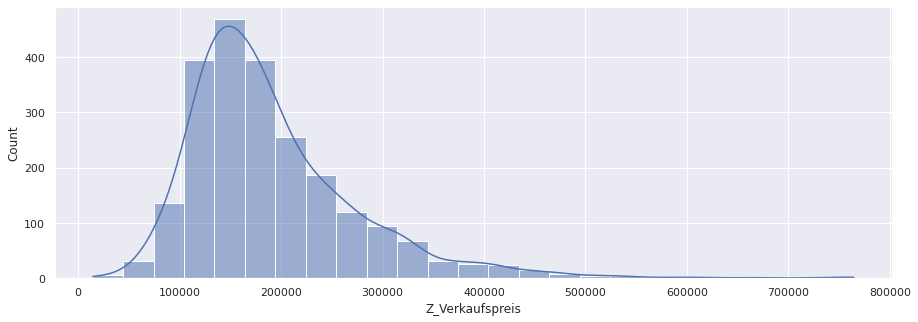

In [ ]:
sns.histplot(data=df, x="Z_Verkaufspreis", bins=25, kde=True)

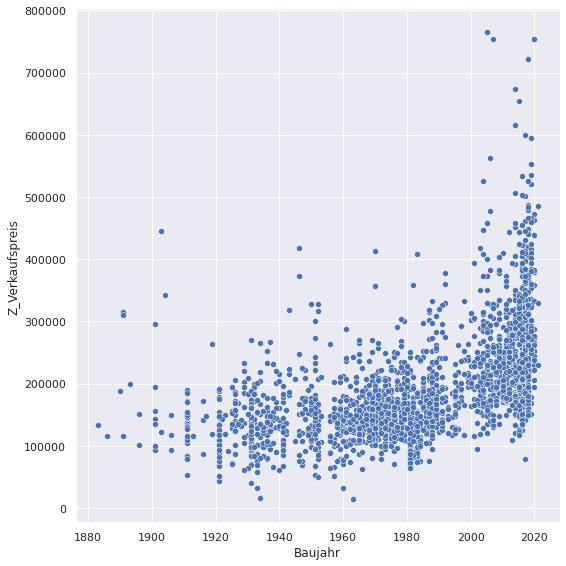

In [ ]:
sns.pairplot(df, x_vars=["Baujahr"], y_vars=["Z_Verkaufspreis"], height=8)

## Prepare the Data

### Data Encoding

Fill unknown amount of floors with -1.

In [ ]:
df["Ausbaustufe"].fillna(-1, inplace=True)
df["Ausbaustufe"].head()

0   -1.0
1    1.0
2    1.5
3   -1.0
4    2.0
Name: Ausbaustufe, dtype: float64

Map the building density to numbers between 1 and 3 and set unknown values to -1.

In [ ]:
def encode_bebauungsdichte(value):
  label = 0
  if value == "Niedrig":
    label = 1
  elif value == "Mittel":
    label = 2
  elif value == "Hoch":
    label = 3
  else:
    label = -1
  return label

In [ ]:
df["Bebauungsdichte"] = df["Bebauungsdichte"].apply(lambda x: encode_bebauungsdichte(x))
df["Bebauungsdichte"].head()

0    1
1    1
2    2
3    2
4   -1
Name: Bebauungsdichte, dtype: int64

Turn any rooftop values into an own column which consists of either 0 or 1. Delete the rooftop column afterwards.

In [ ]:
df_dachtyp = pd.get_dummies(df["Dachtyp"])
df_dachtyp.head()

,Flachdach,Mansarddach,Pultdach,Satteldach,Walmdach
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [ ]:
df = df.join(df_dachtyp)
df.drop(["Dachtyp"], axis=1, inplace=True)

Turn any rating values into numeric values between 1 and 5. In case of an empty value, we will write -1 in that cell.

In [ ]:
def encode_rating_features(value):
  label = 0
  value = str(value).lower()
  if "sehr schlecht" == value:
    label = 1
  elif "schlecht" == value:
    label = 2
  elif "durchschnitt" == value:
    label = 3
  elif "gut" == value:
    label = 4
  elif "sehr gut" == value:
    label = 5
  else:
    label = -1
  return label

In [ ]:
df["Fassadenqual"] = df["Fassadenqual"].apply(lambda x: encode_rating_features(x))
df["Fassadenqual"].head()

0    3
1    4
2    3
3    3
4    4
Name: Fassadenqual, dtype: int64

In [ ]:
df["Fassadenzustand"] = df["Fassadenzustand"].apply(lambda x: encode_rating_features(x))
df["Fassadenzustand"].head()

0    3
1    3
2    3
3    3
4    3
Name: Fassadenzustand, dtype: int64

In [ ]:
df["Kellerhoehe"] = df["Kellerhoehe"].apply(lambda x: encode_rating_features(x))
df["Kellerhoehe"].head()

0    4
1    5
2    3
3    4
4    4
Name: Kellerhoehe, dtype: int64

Turn the locations into longitude and latitude coordinations.

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')

In [ ]:
lage_names = df['Lage'].value_counts().index
lage_name_list = list(lage_names)
print(lage_name_list)

['Vaihingen Stuttgart', 'Wangen Stuttgart', 'Bad Cannstatt Stuttgart', 'Birkach Stuttgart', 'Stuttgart Süd', 'Stuttgart Mitte', 'Stuttgart Nord', 'Sillenbuch Stuttgart', 'Plieningen Stuttgart', 'Stuttgart Ost', 'Stuttgart West', 'Möhringen Stuttgart', 'Botnang Stuttgart', 'Stammheim Stuttgart', 'Zuffenhausen Stuttgart', 'Untertürkheim Stuttgart', 'Degerloch Stuttgart', 'Münster Stuttgart', 'Hedelfingen Stuttgart', 'Weilimdorf Stuttgart', 'Stuttgart']


In [ ]:
lage_locations = []
for e in lage_name_list:
    loc = geolocator.geocode(e)
    lage_locations.append(loc.raw)

In [ ]:
lage_locations[0]

{'place_id': 298215492,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'relation',
 'osm_id': 1107807,
 'boundingbox': ['48.7101204', '48.7585309', '9.0386007', '9.1284576'],
 'lat': '48.734330549999996',
 'lon': '9.088779104982365',
 'display_name': 'Vaihingen, Stuttgart, Baden-Württemberg, Deutschland',
 'class': 'boundary',
 'type': 'administrative',
 'importance': 0.5654990317530526,
 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png'}

In [ ]:
def encode_lage_to_coord(city, axis):
    coord = 0
    if city in lage_name_list:
        name_index = lage_name_list.index(city)
        coord = lage_locations[name_index][axis]
        coord = float(coord)
    else:
        loc = geolocator.geocode(city)
        if loc.raw:
          coord = loc.raw[axis]
          coord = float(coord)
        else:
          raise RuntimeError(f"ERROR: Unknown location for {city}")
    return coord

In [ ]:
df['Lage_lon'] = df['Lage'].apply(lambda x: encode_lage_to_coord(x, 'lon'))
df['Lage_lat'] = df['Lage'].apply(lambda x: encode_lage_to_coord(x, 'lat'))
df[['Lage', 'Lage_lon', 'Lage_lat']].head()

,Lage,Lage_lon,Lage_lat
0,Bad Cannstatt Stuttgart,9.214680,48.804883
1,Wangen Stuttgart,9.244927,48.771985
2,Stammheim Stuttgart,9.157305,48.849798
3,Untertürkheim Stuttgart,9.250900,48.780200
4,Wangen Stuttgart,9.244927,48.771985


In [ ]:
df.drop(['Lage'], axis=1, inplace=True)

Map boolean features to numbers (0 and 1).

In [ ]:
def encode_boolean_features(value):
  if value == "ja":
    label = 1
  elif value == "nein":
    label = 0
  else:
    raise RuntimeError(f"ERROR: Unknown value: {value}")
  return label

In [ ]:
df["Neuverkauf"] = df["Neuverkauf"].apply(lambda x: encode_boolean_features(x))
df["Neuverkauf"].head()

0    0
1    0
2    0
3    0
4    0
Name: Neuverkauf, dtype: int64

In [ ]:
df["Seelage"] = df["Seelage"].apply(lambda x: encode_boolean_features(x))
df["Seelage"].head()

0    0
1    0
2    0
3    0
4    1
Name: Seelage, dtype: int64

Turn house types into own columns.

In [ ]:
df_haustyp = pd.get_dummies(df["Typ"])
df_haustyp.head()

,Doppelhaus,Freistehend,Reihenhaus
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1


In [ ]:
df = df.join(df_haustyp)
df.drop(["Typ"], axis=1, inplace=True)

Our final dataset after feature encoding:

In [ ]:
df = df.sort_index(axis=1)

In [ ]:
df

,AnzahlZimmer,Ausbaustufe,Baeder,BaederUG,Baujahr,Bebauungsdichte,Doppelhaus,EG_qm,Fassadenqual,Fassadenzustand,...,Satteldach,Seelage,ToilettenEG,ToilettenUG,Umgebaut,Verkaufsjahr,Verkaufsmonat,Walmdach,Wohnflaeche_qm,Z_Verkaufspreis
0,3,-1.0,1,1,1989,1,0,95,3,3,...,1,0,0,0,1989,2017,10,0,95,154772
1,3,1.0,2,1,2015,1,0,157,4,3,...,1,0,0,0,2016,2015,8,0,157,298846
2,3,1.5,1,0,1941,2,0,103,3,3,...,1,0,0,0,1961,2015,6,0,103,135697
3,1,-1.0,1,1,1983,2,0,58,3,3,...,1,0,0,0,1983,2021,5,0,58,92994
4,2,2.0,2,1,2016,-1,0,55,4,3,...,1,1,1,0,2016,2017,5,0,111,173723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,3,1.0,2,1,2017,-1,0,154,4,3,...,1,1,0,0,2018,2020,3,0,154,344642
2273,1,1.0,0,1,1933,1,0,84,2,2,...,1,0,1,0,1961,2019,3,0,84,69466
2274,4,2.0,2,0,1987,1,0,102,3,3,...,0,0,1,0,1987,2018,9,0,182,224472
2275,2,1.0,1,0,1963,1,0,85,3,3,...,1,0,0,0,1963,2015,6,0,85,109512


### Feature Definition

In [ ]:
result = "Z_Verkaufspreis"
features = list(df.columns)
features.remove(result)

In [ ]:
features

['AnzahlZimmer',
 'Ausbaustufe',
 'Baeder',
 'BaederUG',
 'Baujahr',
 'Bebauungsdichte',
 'Doppelhaus',
 'EG_qm',
 'Fassadenqual',
 'Fassadenzustand',
 'Flachdach',
 'Freistehend',
 'Garagen',
 'Gesamteindruck',
 'Grundstueck_qm',
 'Kamine',
 'KellerQual',
 'Keller_qm',
 'Kellerhoehe',
 'Lage_lat',
 'Lage_lon',
 'Mansarddach',
 'Neuverkauf',
 'Pultdach',
 'Reihenhaus',
 'Satteldach',
 'Seelage',
 'ToilettenEG',
 'ToilettenUG',
 'Umgebaut',
 'Verkaufsjahr',
 'Verkaufsmonat',
 'Walmdach',
 'Wohnflaeche_qm']

In [ ]:
X = df[features]
y = df[result]

### Split into Train and Test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Define and Train the Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Test the Model

In [ ]:
score = model.score(X_test, y_test)

In [ ]:
print(f"Overall model score: {round(score*100, 2)}%")

Overall model score: 84.04%


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
print(f"Mean Absolute Error (MAE) for Linear Regression: +/-{round(mae, 2)}€")
print(f"Mean Absolute Percentage Error (MAPE) for Linear Regression: +/-{round(mape*100, 2)}%")

Mean Absolute Error (MAE) for Linear Regression: +/-23653.52€
Mean Absolute Percentage Error (MAPE) for Linear Regression: +/-13.69%


## Field Testing

In [ ]:
my_building = {
    'AnzahlZimmer': [4],
    'Ausbaustufe': [3],
    'Baeder': [1],
    'BaederUG': [0],
    'Baujahr': [1980],
    'Bebauungsdichte': [2],
    'Dachtyp': ["Flachdach"],
    'EG_qm': [120],
    'Fassadenqual': [4],
    'Fassadenzustand': [3],
    'Garagen': [1],
    'Gesamteindruck': [5],
    'Grundstueck_qm': [500],
    'Kamine': [0],
    'KellerQual': [3],
    'Keller_qm': [50],
    'Kellerhoehe': [3],
    'Lage': ["Bad Cannstatt Stuttgart"],
    'Neuverkauf': [0],
    'Seelage': [1],
    'ToilettenEG': [1],
    'ToilettenUG': [1],
    'Typ': ["Freistehend"],
    'Umgebaut': [2020],
    'Verkaufsjahr': [2022],
    'Verkaufsmonat': [12],
    'Wohnflaeche_qm': [200]
}

In [ ]:
my_X = pd.DataFrame(data=my_building)
my_X

,AnzahlZimmer,Ausbaustufe,Baeder,BaederUG,Baujahr,Bebauungsdichte,Dachtyp,EG_qm,Fassadenqual,Fassadenzustand,...,Lage,Neuverkauf,Seelage,ToilettenEG,ToilettenUG,Typ,Umgebaut,Verkaufsjahr,Verkaufsmonat,Wohnflaeche_qm
0,4,3,1,0,1980,2,Flachdach,120,4,3,...,Bad Cannstatt Stuttgart,0,1,1,1,Freistehend,2020,2022,12,200


In [ ]:
print(list(df_dachtyp.columns))
print(list(df_haustyp.columns))

['Flachdach', 'Mansarddach', 'Pultdach', 'Satteldach', 'Walmdach']
['Doppelhaus', 'Freistehend', 'Reihenhaus']


In [ ]:
def estimate_price(df):
  # Dachtyp encoding
  dachtyp = pd.get_dummies(df["Dachtyp"])
  for e in list(df_dachtyp.columns):
    try:
      df = df.join(dachtyp[e])
    except:
      df[e] = 0
  df.drop(["Dachtyp"], axis=1, inplace=True)
  # Haustyp encoding
  haustyp = pd.get_dummies(df["Typ"])
  for e in list(df_haustyp.columns):
    try:
      df = df.join(haustyp[e])
    except:
      df[e] = 0
  df.drop(["Typ"], axis=1, inplace=True)
  # Lage encoding
  df['Lage_lon'] = df['Lage'].apply(lambda x: encode_lage_to_coord(x, 'lon'))
  df['Lage_lat'] = df['Lage'].apply(lambda x: encode_lage_to_coord(x, 'lat'))
  df.drop(['Lage'], axis=1, inplace=True)

  df = df.sort_index(axis=1)
  pred = model.predict(df)
  return pred[0]

In [ ]:
price = estimate_price(my_X)
print(f"Predicted price for my building: {round(price, 2)}€")

Predicted price for my building: 295978.64€
